In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
k = 10    # number of bandits
eps = 0.01    # greedy exploration probability
steps = 1000
optimism = 0.4

In [0]:
# initialize
Q = np.zeros(k)   # the average reward
Q += optimism
N = np.zeros(k)   # number of occurences of a particular bandit

In [90]:
B = np.random.random(k)
B *= 2
B -= 1
B

array([-0.18134362, -0.00269297,  0.37315547,  0.72554497,  0.80805597,
        0.92205504, -0.1262451 ,  0.27131062, -0.1713445 , -0.83678412])

In [0]:
# outs a random number from the normal distribution of bandit index (0,9)
def bandit(index):
  return np.random.normal(B[index],1)

In [0]:
total_reward = 0
avg_reward = []

for i in range(steps):
  if np.random.random() > eps:
    A = np.random.choice(np.flatnonzero(Q == Q.max()))
  else:
    A = np.random.choice([_ for _ in range(10)])
  R = bandit(A)
  N[A] += 1
  Q[A] += (R - Q[A])/N[A]
  total_reward += R
  avg_reward.append(total_reward/(i+1))

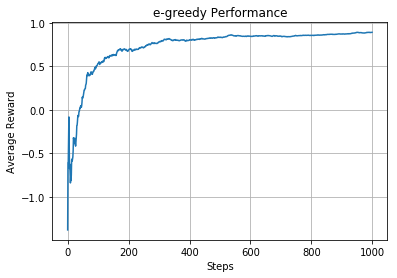

In [93]:
plt.plot(avg_reward)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('e-greedy Performance')
plt.grid(True)
plt.show()